In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def import_data(csv_name):
    csv_pd = pd.read_csv(csv_name)
    csv_pd.Timestamp = pd.to_datetime(csv_pd.Timestamp)
    csv_pd['Year'] = csv_pd.Timestamp.dt.year
    csv_pd['Month'] = csv_pd.Timestamp.dt.month
    csv_pd['Day'] = csv_pd.Timestamp.dt.day
    csv_pd['Hour'] = csv_pd.Timestamp.dt.hour
    csv_pd['Minute'] = csv_pd.Timestamp.dt.minute
    csv_pd['Second'] = csv_pd.Timestamp.dt.second
    return csv_pd
residential_demand = import_data('residential_demand.csv')
turbine_telemetry = import_data('turbine_telemetry.csv')

In [3]:
residential_demand

,Timestamp,Demand_mean_kw,N_households,Year,Month,Day,Hour,Minute,Second
0,2017-01-01 00:00:00,0.220106,5428,2017,1,1,0,0,0
1,2017-01-01 00:30:00,0.205945,5429,2017,1,1,0,30,0
2,2017-01-01 01:00:00,0.189090,5429,2017,1,1,1,0,0
3,2017-01-01 01:30:00,0.173118,5429,2017,1,1,1,30,0
4,2017-01-01 02:00:00,0.159051,5429,2017,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...
17563,2018-01-01 21:30:00,0.305905,10730,2018,1,1,21,30,0
17564,2018-01-01 22:00:00,0.282975,10731,2018,1,1,22,0,0
17565,2018-01-01 22:30:00,0.256498,10731,2018,1,1,22,30,0
17566,2018-01-01 23:00:00,0.245829,10731,2018,1,1,23,0,0


### The following parts is to add additional columns to turbine_telemetry for future data analysis

In [75]:
# Change the power_kw which is largrer than setpoint_kw to setpoint_kw

location = turbine_telemetry['Power_kw'] >= turbine_telemetry['Setpoint_kw']
turbine_telemetry.loc[location, 'Power_kw'] = 900
turbine_telemetry

,Timestamp,Power_kw,Setpoint_kw,Wind_ms,Year,Month,Day,Hour,Minute,Second
0,2015-05-28 00:00:23,80.0,900.0,4.9,2015,5,28,0,0,23
1,2015-05-28 00:01:23,78.0,900.0,5.4,2015,5,28,0,1,23
2,2015-05-28 00:02:23,52.0,900.0,4.9,2015,5,28,0,2,23
3,2015-05-28 00:03:23,57.0,900.0,4.6,2015,5,28,0,3,23
4,2015-05-28 00:04:23,54.0,900.0,4.6,2015,5,28,0,4,23
...,...,...,...,...,...,...,...,...,...,...
1069631,2018-01-11 06:10:32,99.0,900.0,5.9,2018,1,11,6,10,32
1069632,2018-01-11 06:11:32,105.0,900.0,5.7,2018,1,11,6,11,32
1069633,2018-01-11 06:12:32,93.0,900.0,5.8,2018,1,11,6,12,32
1069634,2018-01-11 06:13:32,97.0,900.0,5.5,2018,1,11,6,13,32


In [79]:
# Remove the rows with nan values. 

turbine_telemetry_replace_nan = turbine_telemetry.copy()
Power_Wind_pd = turbine_telemetry_replace_nan[['Timestamp','Power_kw','Wind_ms']]
Setpoint_pd = turbine_telemetry_replace_nan[['Timestamp','Setpoint_kw']]
Power_Wind_pd.fillna(method='bfill',inplace=True)
Setpoint_pd.fillna(method='ffill',inplace=True)
turbine_telemetry_replace_nan = pd.merge(turbine_telemetry_replace_nan, Power_Wind_pd, on=["Timestamp"])
turbine_telemetry_replace_nan = pd.merge(turbine_telemetry_replace_nan, Setpoint_pd, on=["Timestamp"])
turbine_telemetry_replace_nan=turbine_telemetry_replace_nan.drop(columns = ['Power_kw_x','Setpoint_kw_x','Wind_ms_x'])
turbine_telemetry_replace_nan['Timestamp_minus_sc'] = turbine_telemetry_replace_nan['Timestamp'].dt.floor('T')
turbine_telemetry_replace_nan = turbine_telemetry_replace_nan.drop_duplicates(subset=['Timestamp_minus_sc'], keep='last')
turbine_telemetry_replace_nan=turbine_telemetry_replace_nan.rename(columns={'Power_kw_y':'Power_kw','Wind_ms_y':'Wind_ms','Setpoint_kw_y':'Setpoint_kw'})
turbine_telemetry_replace_nan = turbine_telemetry_replace_nan.drop(columns = ['Timestamp_minus_sc'])
turbine_telemetry_replace_nan

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Timestamp,Year,Month,Day,Hour,Minute,Second,Power_kw,Wind_ms,Setpoint_kw
0,2015-05-28 00:00:23,2015,5,28,0,0,23,80.0,4.9,900.0
1,2015-05-28 00:01:23,2015,5,28,0,1,23,78.0,5.4,900.0
2,2015-05-28 00:02:23,2015,5,28,0,2,23,52.0,4.9,900.0
3,2015-05-28 00:03:23,2015,5,28,0,3,23,57.0,4.6,900.0
4,2015-05-28 00:04:23,2015,5,28,0,4,23,54.0,4.6,900.0
...,...,...,...,...,...,...,...,...,...,...
1069631,2018-01-11 06:10:32,2018,1,11,6,10,32,99.0,5.9,900.0
1069632,2018-01-11 06:11:32,2018,1,11,6,11,32,105.0,5.7,900.0
1069633,2018-01-11 06:12:32,2018,1,11,6,12,32,93.0,5.8,900.0
1069634,2018-01-11 06:13:32,2018,1,11,6,13,32,97.0,5.5,900.0


In [85]:
# Add additional timestamp column in turbine telemetry to match the timestamp in residential_demand
import datetime
turbine_telemetry_replace_nan['Timestamp_H'] = turbine_telemetry_replace_nan['Timestamp'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,30*(dt.minute // 30)))
turbine_telemetry_replace_nan

,Timestamp,Year,Month,Day,Hour,Minute,Second,Power_kw,Wind_ms,Setpoint_kw,Timestamp_H
0,2015-05-28 00:00:23,2015,5,28,0,0,23,80.0,4.9,900.0,2015-05-28 00:00:00
1,2015-05-28 00:01:23,2015,5,28,0,1,23,78.0,5.4,900.0,2015-05-28 00:00:00
2,2015-05-28 00:02:23,2015,5,28,0,2,23,52.0,4.9,900.0,2015-05-28 00:00:00
3,2015-05-28 00:03:23,2015,5,28,0,3,23,57.0,4.6,900.0,2015-05-28 00:00:00
4,2015-05-28 00:04:23,2015,5,28,0,4,23,54.0,4.6,900.0,2015-05-28 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1069631,2018-01-11 06:10:32,2018,1,11,6,10,32,99.0,5.9,900.0,2018-01-11 06:00:00
1069632,2018-01-11 06:11:32,2018,1,11,6,11,32,105.0,5.7,900.0,2018-01-11 06:00:00
1069633,2018-01-11 06:12:32,2018,1,11,6,12,32,93.0,5.8,900.0,2018-01-11 06:00:00
1069634,2018-01-11 06:13:32,2018,1,11,6,13,32,97.0,5.5,900.0,2018-01-11 06:00:00


### (Finished) 

### The following part is to combine the turbine telemetry data and residential demand data 

In [126]:
residential_demand = residential_demand.rename(columns={'Timestamp':'Timestamp_H'})
combined_data=pd.merge(turbine_telemetry_replace_nan,residential_demand,how='inner',on=['Timestamp_H'])
drop_columns = ['Timestamp','Year_x','Month_x','Day_x','Hour_x','Minute_x','Second_x','Second_y']
combined_data=combined_data.drop(columns=drop_columns)
rename_columns = {'Year_y':'year',"Month_y":"Month","Day_y":"Day","Hour_y":"Hour","Minute_y":"Minute"}
drop_columns = ['Month','Day','Hour','Day','Minute']
combined_data=combined_data.rename(columns = rename_columns)
combined_data=combined_data.drop(columns=drop_columns)
combined_data

,Power_kw,Wind_ms,Setpoint_kw,Timestamp_H,Demand_mean_kw,N_households,year,Total_energy_demand(KWh)
0,900.0,13.1,900.0,2017-01-01 00:00:00,0.220106,5428,2017,597.369
1,756.0,12.4,900.0,2017-01-01 00:00:00,0.220106,5428,2017,597.369
2,900.0,13.8,900.0,2017-01-01 00:00:00,0.220106,5428,2017,597.369
3,900.0,13.3,900.0,2017-01-01 00:00:00,0.220106,5428,2017,597.369
4,860.0,12.9,900.0,2017-01-01 00:00:00,0.220106,5428,2017,597.369
...,...,...,...,...,...,...,...,...
494464,310.0,8.2,900.0,2018-01-01 23:30:00,0.218793,10731,2018,1173.934
494465,210.0,7.3,900.0,2018-01-01 23:30:00,0.218793,10731,2018,1173.934
494466,272.0,7.8,900.0,2018-01-01 23:30:00,0.218793,10731,2018,1173.934
494467,205.0,7.4,900.0,2018-01-01 23:30:00,0.218793,10731,2018,1173.934


### (Finished)

### The following part is to transfer the combined data to the format of intra day table

In [127]:
max_setpoint_kw=combined_data.groupby(['Timestamp_H'])['Setpoint_kw'].max()
combined_data_intra = combined_data.groupby(['Timestamp_H']).mean()
combined_data_intra['Max_Setpoint_kw'] = max_setpoint_kw
combined_data_intra

,Power_kw,Wind_ms,Setpoint_kw,Demand_mean_kw,N_households,year,Total_energy_demand(KWh),Max_Setpoint_kw
Timestamp_H,,,,,,,,
2017-01-01 00:00:00,889.766667,13.820000,900.0,0.220106,5428,2017,597.3690,900.0
2017-01-01 00:30:00,893.266667,16.106667,900.0,0.205945,5429,2017,559.0380,900.0
2017-01-01 01:00:00,897.633333,16.380000,900.0,0.189090,5429,2017,513.2845,900.0
2017-01-01 01:30:00,899.966667,17.083333,900.0,0.173118,5429,2017,469.9290,900.0
2017-01-01 02:00:00,900.000000,16.800000,900.0,0.159051,5429,2017,431.7430,900.0
...,...,...,...,...,...,...,...,...
2018-01-01 21:30:00,439.766667,9.700000,900.0,0.305905,10730,2018,1641.1805,900.0
2018-01-01 22:00:00,455.466667,9.670000,900.0,0.282975,10731,2018,1518.3045,900.0
2018-01-01 22:30:00,470.633333,9.950000,900.0,0.256498,10731,2018,1376.2410,900.0


### (Finished)

In [9]:
# Create new dataframe which applies the following two filters
## 1. only keep those rows where wind_ms < 30
## 2. only keep those rows where Power_kw > Setpoint_kw
turbine_telemetry_filter_wind_power = turbine_telemetry_replace_nan.copy()
turbine_telemetry_filter_wind_power=turbine_telemetry_filter_wind_power.loc[turbine_telemetry_filter_wind_power.Wind_ms < 30]
turbine_telemetry_filter_wind_power=turbine_telemetry_filter_wind_power.loc[turbine_telemetry_filter_wind_power.Power_kw>turbine_telemetry_filter_wind_power.Setpoint_kw]
turbine_telemetry_filter_wind_power.to_csv(r'turbine_telemetry_filter_wind_power.csv', index = False)
turbine_telemetry_filter_wind_power

,Timestamp,Year,Month,Day,Hour,Minute,Second,Power_kw,Wind_ms,Setpoint_kw,Timestamp_minus_sc,Timestamp_H
9571,2015-06-03 15:33:23,2015,6,3,15,33,23,900.0,15.5,742.0,2015-06-03 15:33:00,2015-06-03 15:30:00
10077,2015-09-10 00:00:30,2015,9,10,0,0,30,900.0,13.2,312.0,2015-09-10 00:00:00,2015-09-10 00:00:00
10078,2015-09-10 00:01:30,2015,9,10,0,1,30,900.0,14.9,312.0,2015-09-10 00:01:00,2015-09-10 00:00:00
10079,2015-09-10 00:02:30,2015,9,10,0,2,30,900.0,15.6,312.0,2015-09-10 00:02:00,2015-09-10 00:00:00
10081,2015-09-10 00:04:30,2015,9,10,0,4,30,900.0,15.5,812.0,2015-09-10 00:04:00,2015-09-10 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1036535,2017-12-19 03:24:32,2017,12,19,3,24,32,900.0,9.4,0.0,2017-12-19 03:24:00,2017-12-19 03:00:00
1036536,2017-12-19 03:25:32,2017,12,19,3,25,32,900.0,9.0,0.0,2017-12-19 03:25:00,2017-12-19 03:00:00
1039016,2017-12-20 21:03:32,2017,12,20,21,3,32,900.0,13.7,771.0,2017-12-20 21:03:00,2017-12-20 21:00:00
1065536,2018-01-08 09:55:32,2018,1,8,9,55,32,900.0,12.6,311.0,2018-01-08 09:55:00,2018-01-08 09:30:00


### The following part is to find the time moment where curtailed capacity exists
#### The following part is to answer Q1

In [125]:
#In this session we calculate total curtailed energy -> Q1

# convert power,wind,setpoint from min to half hour
max_Pwer_kw_y=turbine_telemetry_replace_nan.groupby(['Year','Wind_ms'])['Power_kw'].max()

max_Pwer_kw_y= pd.DataFrame(max_Pwer_kw_y)
max_Pwer_kw_y.reset_index()
# Calculate curtailed energy
turbine_curtailed = pd.merge(turbine_telemetry_replace_nan,max_Pwer_kw_y, how ='left',on=['Year','Wind_ms'])

turbine_curtailed = turbine_curtailed.rename(columns = {"Power_kw_y": "Max_power_kw_year_wind_ms"})

turbine_curtailed['curtailed_capacity'] = turbine_curtailed.Max_power_kw_year_wind_ms - turbine_curtailed.Power_kw_x

# remove those row where setpoint_kw = 900 or curtailed_capacity = 0
turbine_curtailed = turbine_curtailed[(turbine_curtailed.Setpoint_kw < 900) & (turbine_curtailed.curtailed_capacity>0)]

# Create the total curtailed capactiy by half hour time period
turbine_curtailed_HH = pd.DataFrame(turbine_curtailed.groupby(['Year','Timestamp_H'])['curtailed_capacity'].mean())
turbine_curtailed_HH.rename(columns={'curtailed_capacity':'curtailed_capacity(KW)'},inplace=True)
turbine_curtailed_HH=turbine_curtailed_HH.reset_index()
turbine_curtailed_HH

,Year,Timestamp_H,curtailed_capacity(KW)
0,2015,2015-06-03 15:30:00,651.000000
1,2015,2015-09-10 00:00:00,728.666667
2,2015,2015-09-10 01:00:00,882.000000
3,2015,2015-09-10 01:30:00,571.500000
4,2015,2015-09-10 06:30:00,665.250000
...,...,...,...
4493,2017,2017-12-18 21:00:00,6.000000
4494,2017,2017-12-19 03:00:00,894.000000
4495,2017,2017-12-20 21:00:00,5.000000
4496,2018,2018-01-08 09:30:00,165.000000


### Finished

### The following part is to integrate the curtailed_capacity at each time momement into the combined data

In [150]:
combined_data_intra_with_curtailed_capacity = combined_data_intra.merge(turbine_curtailed_HH,how='left',on=['Timestamp_H'])
combined_data_intra_with_curtailed_capacity = combined_data_intra_with_curtailed_capacity.drop(columns=['year','Year'])
combined_data_intra_with_curtailed_capacity=combined_data_intra_with_curtailed_capacity.fillna(0)
rename_columns = {'Power_kw':'Power_kw(per turbine)','curtailed_capacity(KW)':'curtailed_capacity(KW)(per turbine)'}
combined_data_intra_with_curtailed_capacity = combined_data_intra_with_curtailed_capacity.rename(columns=rename_columns)
combined_data_intra_with_curtailed_capacity['Hour'] = combined_data_intra_with_curtailed_capacity['Timestamp_H'].dt.hour
combined_data_intra_with_curtailed_capacity['Export Energy(kwh)'] = 40000*0.5
combined_data_intra_with_curtailed_capacity

,Timestamp_H,Power_kw(per turbine),Wind_ms,Setpoint_kw,Demand_mean_kw,N_households,Total_energy_demand(KWh),Max_Setpoint_kw,curtailed_capacity(KW)(per turbine),Hour,Export Energy(kwh)
0,2017-01-01 00:00:00,889.766667,13.820000,900.0,0.220106,5428,597.3690,900.0,0.0,0,20000.0
1,2017-01-01 00:30:00,893.266667,16.106667,900.0,0.205945,5429,559.0380,900.0,0.0,0,20000.0
2,2017-01-01 01:00:00,897.633333,16.380000,900.0,0.189090,5429,513.2845,900.0,0.0,1,20000.0
3,2017-01-01 01:30:00,899.966667,17.083333,900.0,0.173118,5429,469.9290,900.0,0.0,1,20000.0
4,2017-01-01 02:00:00,900.000000,16.800000,900.0,0.159051,5429,431.7430,900.0,0.0,2,20000.0
...,...,...,...,...,...,...,...,...,...,...,...
16551,2018-01-01 21:30:00,439.766667,9.700000,900.0,0.305905,10730,1641.1805,900.0,0.0,21,20000.0
16552,2018-01-01 22:00:00,455.466667,9.670000,900.0,0.282975,10731,1518.3045,900.0,0.0,22,20000.0
16553,2018-01-01 22:30:00,470.633333,9.950000,900.0,0.256498,10731,1376.2410,900.0,0.0,22,20000.0
16554,2018-01-01 23:00:00,408.466667,9.213333,900.0,0.245829,10731,1318.9945,900.0,0.0,23,20000.0


### Finished

<ipython-input-157-fe04a03bc3a7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_data_intraday = combined_data_intra_with_curtailed_capacity.groupby(['Hour'])['Total_energy_demand(KWh)','curtailed_capacity(KW)(per turbine)','Export Energy(kwh)'].mean()


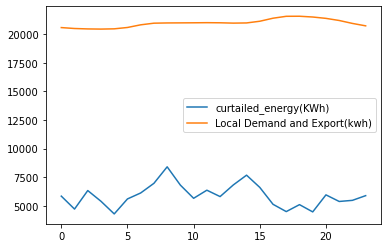

In [157]:
# Tranfer the combined_data_intra_with_curtailed_capacity to intraday table
combined_data_intraday = combined_data_intra_with_curtailed_capacity.groupby(['Hour'])['Total_energy_demand(KWh)','curtailed_capacity(KW)(per turbine)','Export Energy(kwh)'].mean()
combined_data_intraday['curtailed_energy(KWh)'] = combined_data_intraday['curtailed_capacity(KW)(per turbine)'] * 500 / 2
combined_data_intraday['Local Demand and Export(kwh)'] = combined_data_intraday['Total_energy_demand(KWh)'] + combined_data_intraday['Export Energy(kwh)']

x = combined_data_intraday.index.values
y1 = combined_data_intraday['curtailed_energy(KWh)']
y2 = combined_data_intraday['Local Demand and Export(kwh)']
plt.plot(x,y1,label='curtailed_energy(KWh)')
plt.plot(x,y2,label='Local Demand and Export(kwh)')
plt.legend()

# -------------------------------------------------------------------------------------------------------------------------

In [46]:
# Calculate the total curtailed energy per year  - per turbine!
total_curtailed_energy_per_year = pd.DataFrame(turbine_curtailed_HH.groupby(['Year'])['curtailed_capacity(KW)'].sum())
total_curtailed_energy_per_year['curtailed_energy(KWh)']= total_curtailed_energy_per_year['curtailed_capacity(KW)']/2
total_curtailed_energy_per_year

,curtailed_capacity(KW),curtailed_energy(KWh)
Year,,
2015,74348.886780,37174.443390
2016,844309.568548,422154.784274
2017,389929.293679,194964.646840
2018,368.000000,184.000000


In [13]:
#In this session we calculate total demand

#turbine_curtailed_2017 = turbine_curtailed[turbine_curtailed.Year == 2016]
turbine_curtailed_2017 = turbine_curtailed

turbine_curtailed_2017['Hour'] = turbine_curtailed_2017['Timestamp_H'].dt.hour
turbine_curtailed_2017['Minute'] = turbine_curtailed_2017['Timestamp_H'].dt.minute
turbine_curtailed_2017_Hour_Minute = pd.DataFrame(data = turbine_curtailed_2017.groupby(['Hour'])['curtailed_capacity'].mean())
turbine_curtailed_2017_Hour_Minute=turbine_curtailed_2017_Hour_Minute.reset_index()
x = turbine_curtailed_2017_Hour_Minute.index.values
y = turbine_curtailed_2017_Hour_Minute.curtailed_capacity
print(turbine_curtailed_2017_Hour_Minute)
plt.plot(x,y)

NameError: name 'turbine_curtailed' is not defined

In [29]:
# calculate the total supply
turbine_curtailed

NameError: name 'turbine_curtailed' is not defined

In [61]:
#calculate total customer yearly demand
residential_demand['Total_energy_demand(KWh)'] = residential_demand.Demand_mean_kw * residential_demand.N_households/2
intraday_residential_demand = pd.DataFrame(residential_demand.groupby(['Timestamp'])['Total_energy_demand(KWh)'].mean()).reset_index()
intraday_residential_demand['Hour'] = yearly_residential_demand.Timestamp.dt.hour
intraday_residential_demand = pd.DataFrame(residential_demand.groupby(['Hour'])['Total_energy_demand(KWh)'].sum()).reset_index()
intraday_residential_demand

# yearly_residential_demand = pd.DataFrame(residential_demand.groupby(['Year'])['Total_energy_demand(KWh)'].sum())

# # yearly_residential_demand=yearly_residential_demand.merge(total_curtailed_energy_per_year,on='Year',how='left')

# yearly_residential_demand
# #calculate percentage of curtailed energy out of total generation

# yearly_residential_demand['Total_energy_demand(KWh)+export'] = yearly_residential_demand['Total_energy_demand(KWh)'] + 40*1000*365*24

# #increase curtailed energy by 500 times as there is 500 turbines
# yearly_residential_demand['curtailed_energy/total_consumption_2'] = 500*yearly_residential_demand['curtailed_energy(KWh)'] / yearly_residential_demand['Total_energy_demand(KWh)+export']
# yearly_residential_demand['curtailed_energy/total_consumption'] = 500*yearly_residential_demand['curtailed_energy(KWh)'] / yearly_residential_demand['Total_energy_demand(KWh)']


# # by taking assumption that total electricity demand=total number of household + there will always be 40MW energy to mainland at any point in time
# # curtailed energy is 26.6% of total energy consumption.


,Hour,Total_energy_demand(KWh)
0,0,4.091172e+05
1,1,3.517239e+05
2,2,3.252467e+05
3,3,3.153826e+05
4,4,3.320972e+05
5,5,4.190431e+05
6,6,5.863299e+05
7,7,6.880329e+05
8,8,7.040620e+05
9,9,7.092929e+05


KeyError: 'curtailed_energy(KWh)'

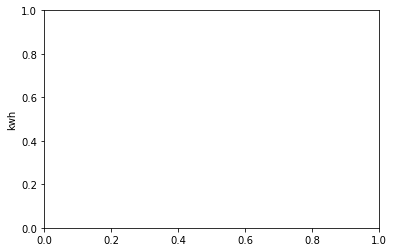

In [139]:
# Plot the intra day curtailed energy versus total demand
x = intraday_residential_demand.Hour
plt.plot(x,intraday_residential_demand['Total_energy_demand(KWh)'],label='Total_energy_demand(KWh)')
plt.ylabel('kwh')
plt.plot(x,intraday_curtailed_energy['curtailed_energy(KWh)'],label = 'Curtailed_energy(KWh)')
plt.legend()

# Q1: How much energy is currently curtailed annually across Orkney Isles?

### Step 1: 
To find max  curtailment from wind generator point of view
i.e. find difference betwee setpoint and power_kw_y. 
#This is the max amount of curtailment without customer consumption

Steps:
    1. curtailed energy per timestamp = Max(Power_kw_y - setpoint,0) => result_1 (done!)
    2 calculate energy curtailment based on historical_max_power_kw_-current_power_kw if setpoint>900 (to do by arianna &qian-aim for tonight   done!)
    3. aggregate the dataset to half hourly dataset (to do by arianna &qian-aim for tonight-done!)
    4. Calculate the yearly curtailed energy (to do by arianna &qian-aim for tonight-done!)
    
 

# Q2: How much can this be reduced by different levels of DR penetration?

### in addtion, Step 2 to include customer and 40MW export
To find available curtailment with customer demand involved. This is max amount of curtailment can be saved with extreme high DR penetration! 

i.e. new curtailment = result_1 - total demand - 40 (if there is any left_over, this is possible curtailment)

Steps: 
    1. Total customer demand = N households*Demand_mean_kw (to do by arianna &qian - aim for tonight - done!)  
    
    2. curstomer involved curtailment = Max(result_1 - 40 - total customer demand,0)  => call that result_2 (to do by arianna &qian-aim for tonight - we calculated the annual total)
        2.1 finding: curtailed energy = 26.6% of total energy consumption
        2.2 finding: total customer electricity consumption increase from 5-ish pm onwards, this is also the time that wind farm most likely been uncurtailed - see powerbi.
    



# Q3:How many local households would need to be on our DR scheme in order to supply this level of DR?

### in addition, Step 3 to include heating period in

#Note that the company have control of customer's heater, hence it's not on customer's side to determine whether he want to switch the control on or not

#As such, the company will choose the heating period that depend on time period that has maximum daily curtailed energy loss. This is because he he only have one year of customer's demand data and as such can't anticipate exactly what customer is going to demand in each day)

####  Note: We can further break it down to different seasonality, weekday/weekend, or at daily level for further steps!

Steps:
    1. search average heating time for hot water system, search for DR system MW 
    2. Plot avearge intraday curtailed energy => convert result_2 to average amount
    3. Calculate curtailed energy by split up result_2 by different charging window, and amount of customer!-- We need to align on how to deal with this problem!
        My thoughts:
            1. Assume customer penetration 10%, given charging window 2hour(as example), use the charging window from  previous step to calculate energy save that could potentionally be curtailed.
            2. What if we change customer penetration to 20%? How about 30%? How much energy can the company save now?
